In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.layers import LSTM, Embedding, Bidirectional
from tensorflow.keras.layers import Dense, Dropout, Flatten

C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [2]:
df = pd.read_csv("/Users/hp/Desktop/group/YearPredictionMSD.txt", header = None)

In [3]:
df.shape

(515345, 91)

In [4]:
df.head()

0         1         2         3         4         5         6         7   \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         8         9   ...        81         82        83        84        85  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

         86         87        88         89        90  
0 -23.08793   68.40795  -1.82223  -27.46348   2.26327  
1 -32.22788   70.49388  12.04941   58.43453  26.92061  
2  43.20130 -115.00698  -0.05859   39.67068  -0.66345  
3  82.58061  -72.08993   9.90558  199.62971  18.85382  
4  -7.50035   51.76631   7.88713   55.66926  28.74903  

[5 rows x 91 columns]

In [5]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
Length: 91, dtype: int64

In [6]:
df.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
61    float64
62    float64
63    float64
64    float64
65    float64
66    float64
67    float64
68    float64
69    float64
70    float64
71    float64
72    float64
73    float64
74    float64
75    float64
76    float64
77    float64
78    float64
79    float64
80    float64
81    float64
82    float64
83    float64
84    float64
85    float64
86    float64
87    float64
88    float64
89    float64
90    float64
Length: 91, dtype: object

In [7]:
x = df.iloc[:, 1:].as_matrix()
y = df.iloc[:, 0].as_matrix()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
#data normalization
x = (x - x.min()) / (x.max() - x.min())  # all values now between 0 and 1

In [9]:
x.shape

(515345, 90)

In [10]:
y.shape

(515345,)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=111)

In [12]:
x_train.shape

(360741, 90)

In [13]:
rnn_model = Sequential()
rnn_model.add(Embedding(90, 128, input_length=90))
rnn_model.add(Bidirectional(LSTM(64)))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(1, activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
rnn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [15]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 90, 128)           11520     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 110,465
Trainable params: 110,465
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = rnn_model.fit(x_train, y_train, epochs=10, batch_size=1000, validation_data = [x_test, y_test])

Train on 360741 samples, validate on 154604 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
360741/360741 [==============================] - 747s 2ms/sample - loss: 3853539.5779 - mean_squared_error: 3853541.0000 - val_loss: 3755579.7630 - val_mean_squared_error: 3755580.2500
Epoch 2/10
360741/360741 [==============================] - 779s 2ms/sample - loss: 3667422.1826 - mean_squared_error: 3667423.2500 - val_loss: 3580329.6216 - val_mean_squared_error: 3580329.0000
Epoch 3/10
360741/360741 [==============================] - 768s 2ms/sample - loss: 3496403.0544 - mean_squared_error: 3496403.2500 - val_loss: 3412790.6133 - val_mean_squared_error: 3412791.0000
Epoch 4/10
360741/360741 [==============================] - 772s 2ms/sample - loss: 3332164.2674 - mean_squared_error: 3332163.2500 - val_loss: 3251314.1348 - val_mean_squared_error: 3251314.0000
Epoch 5/10
360741/360741 [==============================] - 785s 2ms/s

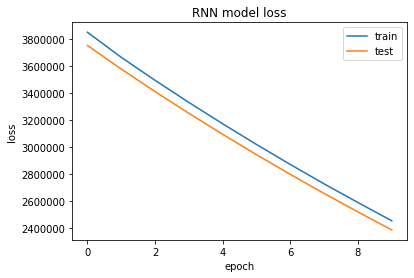

In [17]:
#Printing graph of our RNN training 
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()